### Gathering

In [94]:
import pandas as pd
import os
import requests


- Downloading the image_prediction.tsv file

In [95]:
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
file_name = url.split('/')[-1]
if not os.path.exists(file_name):
    with open(file_name, mode ='wb')as file:
        file.write(response.content)
        

- testing the url downloaded file

In [96]:
image = pd.read_csv(file_name,sep = '\t')
twitter_arch = pd.read_csv ('twitter-archive-enhanced.csv')

- importing tweepy and json to save the content in .txt file 

In [55]:
import tweepy
from tweepy import OAuthHandler
import json

consumer_key = '*****'
consumer_secret = '****'
access_token = '*****'
access_secret = '*****'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_1.tweet_id.values

count = 0
# fails_dict = {}
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as file:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, file)
            file.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass

# fails_dict

- extrcating the info from twitter txt file

In [97]:
import json
import re
# import numpy as np
table = []
with open ('tweet-json.txt') as f:
    for line in f:
        r=json.loads(line)
        tweet_id = r['id']
        retweet_count = r['retweet_count']
        favorite_count = r['favorite_count']
        rating_Numeratoe =re.findall('\d+/\d+',r['full_text'])[0].split('/')[0]
        rating_Denomerator = re.findall('\d+/\d+',r['full_text'])[0].split('/')[1]
        table.append({'id': tweet_id,'retweet_counts': retweet_count,'favorite_counts':favorite_count,'Num_rate':int(rating_Numeratoe),'Deno_rate':int(rating_Denomerator)})
        
tweet_df = pd.DataFrame(table,columns=['id','retweet_counts','favorite_counts','Num_rate','Deno_rate'])

### Assess

- visual Assess with the external csv files

- program Assess

In [98]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               2354 non-null   int64
 1   retweet_counts   2354 non-null   int64
 2   favorite_counts  2354 non-null   int64
 3   Num_rate         2354 non-null   int64
 4   Deno_rate        2354 non-null   int64
dtypes: int64(5)
memory usage: 92.1 KB


- I read line by line as shown but don't know why it's 2354 not 2354

In [99]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [100]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [101]:
tweet_df.head()

,id,retweet_counts,favorite_counts,Num_rate,Deno_rate
0,892420643555336193,8853,39467,13,10
1,892177421306343426,6514,33819,13,10
2,891815181378084864,4328,25461,12,10
3,891689557279858688,8964,42908,13,10
4,891327558926688256,9774,41048,12,10


In [102]:
twitter_arch.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [103]:
image.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [104]:
twitter_arch['retweeted_status_timestamp'].isnull().sum().sum()

2175

In [105]:
twitter_arch['retweeted_status_user_id'].isnull().sum().sum()

2175

In [106]:
twitter_arch['retweeted_status_id'].isnull().sum().sum()

2175

In [107]:
twitter_arch['name'].value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
            ... 
Edmund         1
Horace         1
Jebberson      1
Dixie          1
Marty          1
Name: name, Length: 957, dtype: int64

In [108]:
twitter_arch.query('name=="a"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [109]:
twitter_arch['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [110]:
twitter_arch['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [111]:
list(twitter_arch)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [112]:
twitter_arch[twitter_arch['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [113]:
tweet_df[tweet_df['id'].duplicated()]

,id,retweet_counts,favorite_counts,Num_rate,Deno_rate


In [114]:
twitter_arch[twitter_arch['expanded_urls'].duplicated(keep=False)].sort_values(by='expanded_urls')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
349,831650051525054464,NaN,NaN,2017-02-14 23:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I usually only share these on Friday's, but th...",NaN,NaN,NaN,"http://www.gofundme.com/bluethewhitehusky,http...",13,10,None,None,None,None,None
204,852936405516943360,NaN,NaN,2017-04-14 17:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I usually only share these on F...,8.316501e+17,4.196984e+09,2017-02-14 23:43:18 +0000,"http://www.gofundme.com/bluethewhitehusky,http...",13,10,None,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1940,673716320723169284,6.737159e+17,4.196984e+09,2015-12-07 04:11:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The millennials have spoken and we've decided ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [115]:
twitter_arch[twitter_arch.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


C:\Users\PROOO\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


In [116]:
twitter_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [117]:
tweet_df.describe()

,id,retweet_counts,favorite_counts,Num_rate,Deno_rate
count,2.354000e+03,2354.000000,2354.000000,2354.000000,2354.00000
mean,7.426978e+17,3164.797366,8080.968564,13.127018,10.45582
std,6.852812e+16,5284.770364,11814.771334,45.896135,6.74809
min,6.660209e+17,0.000000,0.000000,0.000000,0.00000
25%,6.783975e+17,624.500000,1415.000000,10.000000,10.00000
50%,7.194596e+17,1473.500000,3603.500000,11.000000,10.00000
75%,7.993058e+17,3652.000000,10122.250000,12.000000,10.00000
max,8.924206e+17,79515.000000,132810.000000,1776.000000,170.00000


In [118]:
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [119]:
twitter_arch['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [120]:
twitter_arch['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [121]:
twitter_arch['tweet_id'].value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
                     ..
715360349751484417    1
666817836334096384    1
794926597468000259    1
673705679337693185    1
700151421916807169    1
Name: tweet_id, Length: 2356, dtype: int64

In [122]:
twitter_arch['expanded_urls'].value_counts()

https://www.gofundme.com/3ti3nps,https://twitter.com/dog_rates/status/868552278524837888/photo/1,https://twitter.com/dog_rates/status/868552278524837888/photo/1                                   2
https://twitter.com/dog_rates/status/680055455951884288/photo/1                                                                                                                                    2
https://www.gofundme.com/surgeryforjacktheminpin,https://twitter.com/dog_rates/status/815990720817401858/photo/1                                                                                   2
https://twitter.com/dog_rates/status/683391852557561860/photo/1                                                                                                                                    2
https://twitter.com/dog_rates/status/839549326359670784/photo/1                                                                                                                                    2
               

In [123]:
all_columns = pd.Series(list(tweet_df) + list(twitter_arch) + list(image))
all_columns[all_columns.duplicated()]

22    tweet_id
dtype: object

In [124]:
image['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
handkerchief            1
silky_terrier           1
traffic_light           1
studio_couch            1
bighorn                 1
Name: p1, Length: 378, dtype: int64

#### Quality
- columns that have "None" instead of Nan values 
- Denomerator not always 10
- name has "a" values
- inaccurate values in denomenator 
- inaccurate values in numerator
- source columns has " \\<a "href = "
- duplicated expanded_url values 
- columns to datetime type 
- Non dog kinds in image_prediction table
- many value that is not any kind of dogs in image_prediction table


#### Tidness
- multiple variable for dog stages
- missed decimel vaLues for numerator_rate
- the API (tweet_df) should be in twitter_archive table
- different name for tweet_df and twitter_archive tables
- drop some unuseful columns in twitter_archive table

## Clean

In [125]:
tw_clean = twitter_arch.copy()
api_clean= tweet_df.copy()
image_clean = image.copy()

### Tidness

- change api_clean columns name to merge with tw_clean table and merg api and tw tables


#### code

In [126]:
api_clean = api_clean.rename(columns={'id':'tweet_id','Num_rate':'rating_numerator','Deno_rate':'rating_denominator'})


In [127]:
common = ['tweet_id','rating_numerator','rating_denominator']
tw_clean = pd.merge(tw_clean, api_clean,on=common, how='left')

#### test

In [128]:

tw_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_counts,favorite_counts
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,9774.0,41048.0


- melt multiple variable for dog_stage

#### code

In [129]:
import numpy as np
tw_clean.doggo.replace('None', '', inplace=True)
tw_clean.floofer.replace('None', '', inplace=True)
tw_clean.pupper.replace('None', '', inplace=True)
tw_clean.puppo.replace('None', '', inplace=True)

# merge into column
tw_clean['dog_stage'] = tw_clean.doggo + tw_clean.floofer + tw_clean.pupper + tw_clean.puppo

# handle multiple stages
tw_clean.loc[tw_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
tw_clean.loc[tw_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
tw_clean.loc[tw_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
tw_clean.loc[tw_clean.dog_stage == '', 'dog_stage'] = np.nan
tw_clean.drop(['doggo','floofer','pupper','puppo'],axis = 1,inplace = True)


#### test

In [130]:
tw_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_counts,favorite_counts,dog_stage
1787,677565715327688705,NaN,NaN,2015-12-17 19:07:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Contortionist pup here. Inside pentagram. Clea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677565715...,6,10,None,513.0,1409.0,NaN
455,818307523543449600,NaN,NaN,2017-01-09 04:04:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Moose. He doesn't want his...,8.164506e+17,4.196984e+09,2017-01-04 01:05:59 +0000,https://twitter.com/dog_rates/status/816450570...,13,10,Moose,9366.0,0.0,NaN
336,832636094638288896,NaN,NaN,2017-02-17 17:01:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Orion. He just got back from the denti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832636094...,12,10,Orion,3220.0,17379.0,NaN
466,817171292965273600,NaN,NaN,2017-01-06 00:49:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tebow. He kindly requests that you put...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817171292...,13,10,Tebow,2326.0,9690.0,NaN
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,594.0,3195.0,NaN


In [131]:
tw_clean['dog_stage'].value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

- melt many variables to specific columns in image_clean table

#### code

In [132]:
# result = image_clean.copy()
image_clean = pd.melt(image_clean, id_vars=['tweet_id', 'jpg_url', 'img_num','p1_conf','p1_dog','p2_conf','p2_dog','p3_conf','p3_dog'],
                           var_name='Algorithm', value_name='result')
image_clean = pd.melt(image_clean, id_vars=['tweet_id', 'jpg_url', 'img_num','p1_dog','Algorithm','p2_dog','result','p3_dog'],
                           var_name='conf', value_name='Algorithm_conf')
image_clean = pd.melt(image_clean, id_vars=['tweet_id','jpg_url','img_num','Algorithm','result','conf','Algorithm_conf'],
                           var_name='pred', value_name='dog_prediction')
image_clean.drop(['conf','pred',],axis = 1,inplace = True)

#### test

In [133]:
image_clean

,tweet_id,jpg_url,img_num,Algorithm,result,Algorithm_conf,dog_prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,p1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,p1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,p1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,p1,miniature_pinscher,0.560311,True
...,...,...,...,...,...,...,...
56020,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,p3,German_short-haired_pointer,0.175219,True
56021,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,p3,spatula,0.040836,False
56022,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,p3,kelpie,0.031379,True
56023,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,p3,papillon,0.068957,True


- drop some unuseful columns in tw_clean table


#### code

In [134]:
col = ['text','in_reply_to_status_id','in_reply_to_user_id']
tw_clean = tw_clean.drop(col,axis = 1)

#### test

In [135]:
tw_clean

,tweet_id,timestamp,source,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_counts,favorite_counts,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853.0,39467.0,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514.0,33819.0,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4328.0,25461.0,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8964.0,42908.0,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9774.0,41048.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,41.0,111.0,NaN
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,147.0,311.0,NaN
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,47.0,128.0,NaN
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,48.0,132.0,NaN


- merge datasets

#### code

In [ ]:
common2=['tweet_id']
tweet_clean = pd.merge(tw_clean, image_clean,on=common2, how='right')

#### test

In [179]:
tweet_clean

,tweet_id,timestamp,source,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_counts,favorite_counts,dog_stage,jpg_url,img_num,Algorithm,result,Algorithm_conf,dog_prediction
27,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514.0,33819.0,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,p1,Chihuahua,0.323581,True
28,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514.0,33819.0,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,p2,Pekinese,0.323581,True
29,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514.0,33819.0,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,p3,papillon,0.323581,True
30,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514.0,33819.0,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,p1,Chihuahua,0.090647,True
31,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514.0,33819.0,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,p2,Pekinese,0.090647,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56020,666020888022790149,2015-11-15 22:32:08+00:00,http://twitter.com/download/iphone,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666020888...,18,10,NaN,532.0,2535.0,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p2,collie,0.156665,True
56021,666020888022790149,2015-11-15 22:32:08+00:00,http://twitter.com/download/iphone,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666020888...,18,10,NaN,532.0,2535.0,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p3,Shetland_sheepdog,0.156665,True
56022,666020888022790149,2015-11-15 22:32:08+00:00,http://twitter.com/download/iphone,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666020888...,18,10,NaN,532.0,2535.0,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,Welsh_springer_spaniel,0.061428,True
56023,666020888022790149,2015-11-15 22:32:08+00:00,http://twitter.com/download/iphone,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666020888...,18,10,NaN,532.0,2535.0,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p2,collie,0.061428,True


- replace None to Nan value

In [137]:
import numpy as np
tweet_clean = tweet_clean.replace('None',np.nan)

### test

In [138]:
tweet_clean

,tweet_id,timestamp,source,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_counts,favorite_counts,dog_stage,jpg_url,img_num,Algorithm,result,Algorithm_conf,dog_prediction
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853.0,39467.0,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,p1,orange,0.097049,False
1,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853.0,39467.0,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,p2,bagel,0.097049,False
2,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853.0,39467.0,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,p3,banana,0.097049,False
3,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853.0,39467.0,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,p1,orange,0.085851,False
4,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853.0,39467.0,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,p2,bagel,0.085851,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56020,666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,532.0,2535.0,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p2,collie,0.156665,True
56021,666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,532.0,2535.0,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p3,Shetland_sheepdog,0.156665,True
56022,666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,532.0,2535.0,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,Welsh_springer_spaniel,0.061428,True
56023,666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,532.0,2535.0,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p2,collie,0.061428,True


## Quality

- remove (\\<a href) from source column

#### code

In [139]:
tweet_clean['source'] = tweet_clean['source'].str.extract('(https?.+iphone)',expand = True)

#### test

In [140]:
tweet_clean['source']

0        http://twitter.com/download/iphone
1        http://twitter.com/download/iphone
2        http://twitter.com/download/iphone
3        http://twitter.com/download/iphone
4        http://twitter.com/download/iphone
                        ...                
56020    http://twitter.com/download/iphone
56021    http://twitter.com/download/iphone
56022    http://twitter.com/download/iphone
56023    http://twitter.com/download/iphone
56024    http://twitter.com/download/iphone
Name: source, Length: 56025, dtype: object

- replace "a" values in name column to Nan value

#### code

In [141]:
tweet_clean['name'].replace('a',np.nan,inplace= True)

#### test

In [142]:
tweet_clean['name']

0        Phineas
1        Phineas
2        Phineas
3        Phineas
4        Phineas
          ...   
56020        NaN
56021        NaN
56022        NaN
56023        NaN
56024        NaN
Name: name, Length: 56025, dtype: object

- replace value != 10 to =10 for Denomenator column

#### code

In [143]:
deno_list = tweet_clean['rating_denominator'].unique()
for i in deno_list:
    tweet_clean['rating_denominator'] = tweet_clean['rating_denominator'].replace(i,10)
    

#### test

In [144]:
tweet_clean['rating_denominator'].value_counts()

10    56025
Name: rating_denominator, dtype: int64

- Slice Numerator values ,the first digit to be equal 1 to handle values below 10

#### code

In [145]:
tweet_clean.rating_numerator = tweet_clean.rating_numerator.astype(str).str.pad(2, fillchar='1')

#### test

In [146]:
tweet_clean['rating_numerator'].value_counts()

12      13041
10      11637
11      11286
13       8181
19       4077
18       2565
14       1512
17       1404
15        945
16        864
27         27
75         27
60         27
121        27
45         27
88         27
204        27
420        27
24         27
44         27
26         27
80         27
165        27
50         27
1776       27
84         27
99         27
144        27
143        27
Name: rating_numerator, dtype: int64

In [147]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56025 entries, 0 to 56024
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    56025 non-null  int64  
 1   timestamp                   56025 non-null  object 
 2   source                      54918 non-null  object 
 3   retweeted_status_id         2187 non-null   float64
 4   retweeted_status_user_id    2187 non-null   float64
 5   retweeted_status_timestamp  2187 non-null   object 
 6   expanded_urls               56025 non-null  object 
 7   rating_numerator            56025 non-null  object 
 8   rating_denominator          56025 non-null  int64  
 9   name                        38934 non-null  object 
 10  retweet_counts              55971 non-null  float64
 11  favorite_counts             55971 non-null  float64
 12  dog_stage                   8667 non-null   object 
 13  jpg_url                     560

- change timestamp dtype to date_time

#### code

In [148]:
tweet_clean['timestamp'] = pd.to_datetime(tweet_clean['timestamp'])
tweet_clean['retweeted_status_timestamp'] = pd.to_datetime(tweet_clean['retweeted_status_timestamp'])



#### test

In [149]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56025 entries, 0 to 56024
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    56025 non-null  int64              
 1   timestamp                   56025 non-null  datetime64[ns, UTC]
 2   source                      54918 non-null  object             
 3   retweeted_status_id         2187 non-null   float64            
 4   retweeted_status_user_id    2187 non-null   float64            
 5   retweeted_status_timestamp  2187 non-null   datetime64[ns, UTC]
 6   expanded_urls               56025 non-null  object             
 7   rating_numerator            56025 non-null  object             
 8   rating_denominator          56025 non-null  int64              
 9   name                        38934 non-null  object             
 10  retweet_counts              55971 non-null  float64       

In [150]:
# df = tw_clean.copy


# def add(a, b, c , d): 
#     return a + b + c + d


# df = tw_clean.copy()
# df['doggo'] = df['doggo'].replace('doggo',1.0).astype(float)
# df['doggo'] = df['doggo'].replace(np.nan,0.0)
# df['floofer'] = df['floofer'].replace('floofer',2.0).astype(float)
# df['floofer'] = df['floofer'].replace(np.nan,0.0)
# df['puppo'] = df['puppo'].replace('puppo',3.0).astype(float)
# df['puppo'] = df['puppo'].replace(np.nan,0.0)
# df['pupper'] = df['pupper'].replace('pupper',4.0).astype(float)
# df['pupper'] = df['pupper'].replace(np.nan,0.0)
# df.head(10)

# df['add'] = df.apply(lambda row : add(row['doggo'], row['floofer'], row['puppo'],row['pupper']), axis = 1) 

# df.head(1)

# items = {0.0:np.nan,1.0 :'doggo',2.0:'floofer',3.0:'pupper',4.0:'puppo'}
# for key , value in items.items():
#     df['add'] = df['add'].replace(key, value)
# df['add'].value_counts()

- cleaning iteration. Reshape the tw_clean table 

#### code

In [151]:
# def add(a, b, c , d): 
#     return a + b + c + d

# data = tw_clean.copy()
# items = {1.0 :'doggo',2.0:'floofer',3.0:'pupper',4.0:'puppo'}
# for key , value in items.items():
#     tw_clean[value] = tw_clean[value].replace(value,key).astype(float)
#     tw_clean[value] = tw_clean[value].replace(np.nan,0.0)

# tw_clean['add'] = tw_clean.apply(lambda row : add(row['doggo'], row['floofer'], row['puppo'],row['pupper']), axis = 1) 

# items_new = {0.0:np.nan,1.0 :'doggo',2.0:'floofer',3.0:'pupper',4.0:'puppo'}
# for key , value in items_new.items():
#     tw_clean['add'] = tw_clean['add'].replace(key, value)
# tw_clean.drop(['doggo','floofer','pupper','puppo',],axis = 1, inplace = True)
# tw_clean = tw_clean.rename(columns={'add':'kind'})

#### test

In [152]:
# tw_clean.head(15)

- there's a tweet that have two kind of dogs, I will remove this row

In [153]:
# kind_5 = tw_clean.query('kind==5')
# tw_clean.drop(kind_5.index,inplace = True)

In [154]:
# tw_clean.info()

- remove all false value in dog_prediction column

#### code

In [155]:
#before modification
tweet_clean['dog_prediction'].value_counts()

True     41256
False    14769
Name: dog_prediction, dtype: int64

In [156]:
tweet_clean = tweet_clean.query('dog_prediction == True')

#### test

In [160]:
tweet_clean['dog_prediction'].value_counts()

True    41256
Name: dog_prediction, dtype: int64

#### storing

In [161]:
# image_clean.to_csv('image_master.csv',index= False)
tweet_clean.to_csv('twitter_archive_master_new2.csv',index= False )

In [162]:
df = pd.read_csv('twitter_archive_master_new2.csv')
%matplotlib inline

In [163]:
tweet_clean['dog_stage'].value_counts()

pupper            4032
doggo             1350
puppo              558
doggo, pupper      234
floofer            180
doggo, floofer      27
doggo, puppo        27
Name: dog_stage, dtype: int64

### visualization

- Most kind of dogs that retweeted by people 

dog_stage
doggo              7810.306667
doggo, floofer     3433.000000
doggo, pupper      4931.576923
doggo, puppo      19196.000000
floofer            5091.700000
pupper             2608.683036
puppo              6475.693548
Name: retweet_counts, dtype: float64

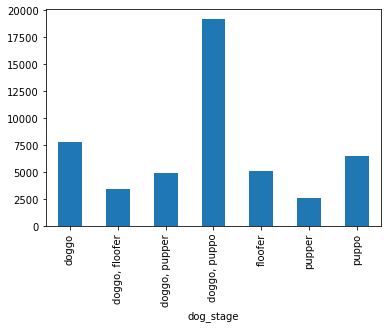

In [164]:
# group1 = df[df['dog']]
group1 = df.groupby('dog_stage')['retweet_counts'].mean()
group1.plot(kind='bar')
group1

- Most kind of dogs that loved by people reaction

dog_stage
doggo             18370.126667
doggo, floofer    17169.000000
doggo, pupper      9918.153846
doggo, puppo      47844.000000
floofer           13562.500000
pupper             7490.187500
puppo             21282.403226
Name: favorite_counts, dtype: float64

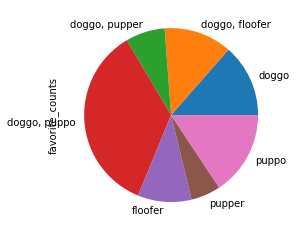

In [165]:
group2 = df.groupby('dog_stage')['favorite_counts'].mean()
group2.plot(kind='pie')
group2 

- most rated dog

In [166]:
group3 = df.groupby('dog_stage')['rating_numerator'].mean()
group3


dog_stage
doggo             12.366667
doggo, floofer    11.000000
doggo, pupper     12.115385
doggo, puppo      13.000000
floofer           12.000000
pupper            12.412946
puppo             12.467742
Name: rating_numerator, dtype: float64

- As the rate is not modified as all values are above 10 but still must be modified. The qustion is : in which way should be modified ?


In [167]:
# df_image = image_clean.copy()
# df_image['dog_prediction'].value_counts()

- worst kind of dog/animal to predicit by P1

- the hardest 20 kind of dogs/animal could be predicted

In [174]:
algo_worst = df.groupby(['Algorithm','result'])[['Algorithm_conf']].max().sort_values(by='Algorithm_conf')

algo_worst = algo_worst.reset_index(level =['result']).loc['p1']
algo_worst.head(20)


,result,Algorithm_conf
Algorithm,,
p1,Egyptian_cat,0.090508
p1,comic_book,0.105171
p1,earthstar,0.127701
p1,weasel,0.137832
p1,space_heater,0.137871
p1,syringe,0.144712
p1,bonnet,0.146440
p1,laptop,0.153718
p1,koala,0.162935


- best 20 kind of dog/animal can be predicted by p1

In [175]:
algo_best = df.groupby(['Algorithm','result'])[['Algorithm_conf']].max().sort_values(by='Algorithm_conf',ascending = False)

algo_best = algo_best.reset_index(level =['result']).loc['p1']
algo_best.head(20)


,result,Algorithm_conf
Algorithm,,
p1,swing,0.999984
p1,barrow,0.999962
p1,komondor,0.999956
p1,chow,0.999953
p1,web_site,0.999916
p1,Labrador_retriever,0.999885
p1,tennis_ball,0.999834
p1,dalmatian,0.999828
p1,Old_English_sheepdog,0.999715


-  Using Matplot Library to visualize between worst and best 5 kind of dog/animal for each Algorithm

In [176]:
import matplotlib.pyplot as plt
def draw(algorithm):
    algo1 = df.groupby(['Algorithm','result'])[['Algorithm_conf']].max().sort_values(by='Algorithm_conf',ascending = False)
    algo1 = algo1.reset_index(level =['result']).loc[algorithm] 
    algo1 = algo1.head().groupby('result')['Algorithm_conf'].max()
    algo1 = algo1.reset_index(level =['result'])
    algo = df.groupby(['Algorithm','result'])[['Algorithm_conf']].max().sort_values(by='Algorithm_conf',ascending = False)
    algo = algo.reset_index(level =['result']).loc[algorithm] 
    algo = algo.tail().groupby('result')['Algorithm_conf'].max()
    algo = algo.reset_index(level =['result'])
    algo_new= algo.append(algo1)
    algo_new.set_index('result',inplace = True)
    return algo_new.plot.bar()

- change between p1,p2 and p3 

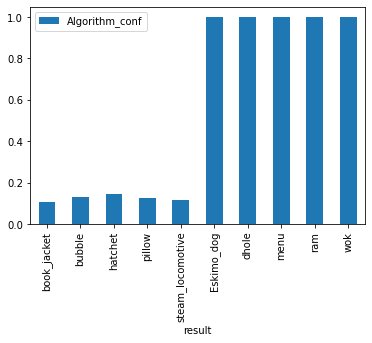

In [177]:
draw('p3')

- the hardest 20 kind of dogs,animal, or stuff could be predicted

- most named dog

Cooper      261
Charlie     252
Tucker      234
Oliver      216
Lucy        207
           ... 
Meera         9
Jangle        9
Storkson      9
Darla         9
Carll         9
Name: name, Length: 850, dtype: int64

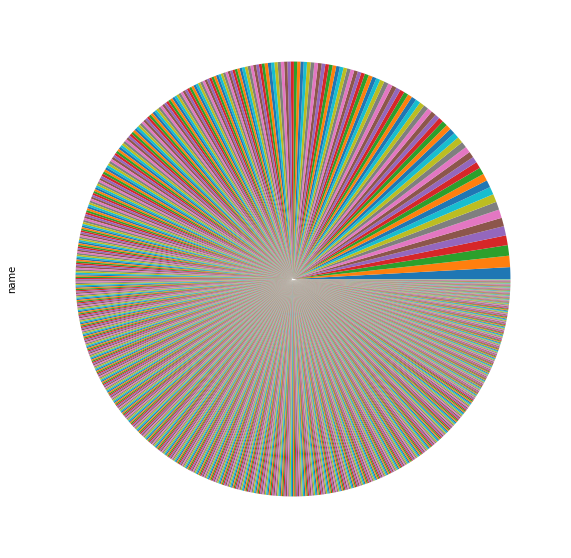

In [178]:
most_name = df['name'].value_counts()
labels=np.full(len(most_name),"")
most_name.plot(kind = 'pie',figsize = (10,10), labels = labels)
most_name
